In [33]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [9]:
model.fit(X_train, Y_train)

LogisticRegression()

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
predictions[:2]

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867]])

In [13]:
model.score(X_train, Y_train)

0.7235188509874326

In [14]:
model.score(X_test, Y_test)

0.7319371727748691

In [31]:
def ROC(predictions, Y_test, thresh):
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    

        if predicted_prob >= thresh:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:

            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    
    return tp, fp, tn, fn

In [36]:
tpr = []
fpr = []


for thresh in np.arange(0, 1, 0.05):
    tp, fp, tn, fn = ROC(predictions, Y_test, thresh)
    
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))
   



In [37]:
import matplotlib.pyplot as plt

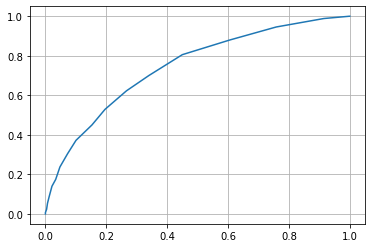

In [38]:
plt.plot( fpr, tpr )
plt.grid()

In [39]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [40]:
# получаем значения false и true positive rate для различных значений порога
fpr1, tpr1, thres1 = roc_curve( Y_test, predictions[:, 1] )

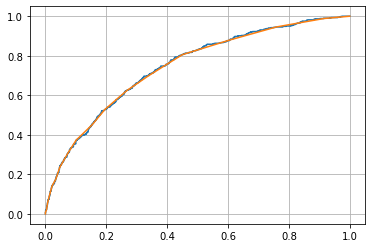

In [42]:
plt.plot( fpr1, tpr1 )
plt.plot( fpr, tpr )
plt.grid()

In [ ]:
(tp / (tp + fp))
(tp / (tp + fn))

In [50]:
pr = []
re = []


for thresh in np.arange(0, 1, 0.1):
    tp, fp, tn, fn = ROC(predictions, Y_test, thresh)
    
    pr.append(tp / (tp + fp))
    re.append(tp / (tp + fn))
   


(0.0, 1.0)

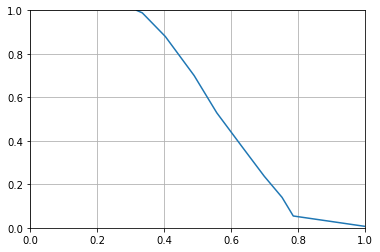

In [48]:
plt.plot(pr,re)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [51]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [52]:
pr0, re0, thres0 = precision_recall_curve( Y_test, predictions[:, 1] )

(0.0, 1.0)

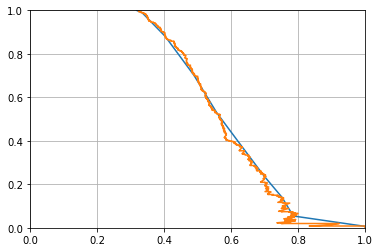

In [53]:
plt.plot(pr,re)
plt.plot(pr0,re0)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)